In [2]:
import pandas as pd
import numpy as np

file1=pd.read_csv('LPOINT_BIG_COMP_01_DEMO.csv')
file2=pd.read_csv('LPOINT_BIG_COMP_02_PDDE.csv')
file3=pd.read_csv('LPOINT_BIG_COMP_03_COP_U.csv')
file4=pd.read_csv('LPOINT_BIG_COMP_04_PD_CLAC.csv')
file5=pd.read_csv('LPOINT_BIG_COMP_05_BR.csv')
file6=pd.read_csv('LPOINT_BIG_COMP_06_LPAY.csv')

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_23056\1096442838.py:5: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  file2=pd.read_csv('LPOINT_BIG_COMP_02_PDDE.csv')


In [3]:
#엘페이 이용자들의 제휴사파악하기
file6.cop_c.unique()
file6['lpoint']=1

In [4]:
l_del=file6['cop_c']!='L01'
file6=file6[l_del]
l_del=file6['cop_c']!='L00'
file6=file6[l_del]

In [5]:
file6.cop_c.unique()

array(['A03', 'A02', 'A06', 'A01', 'C01', 'D02', 'A04', 'D01', 'A05',
       'C02', 'E01', 'B01'], dtype=object)

In [6]:
#2,3번데이터들에 있어서 6번데이터의 제휴사와 같은것들만 추출
file23=pd.concat([file2,file3])
file23_cop=file23[file23['cop_c'].isin(['A03', 'A02', 'A06', 'A01', 'C01', 'D02', 'A04',
       'D01', 'A05', 'C02', 'E01', 'B01'])]
file23=file23_cop.drop(['br_c','pd_c','buy_ct','vst_dt'],axis=1)


In [7]:
#6번데이터는 수량이 없고 총금액만 있으므로 2,3번데이터들도 총금액을 만들어줌
a=file23.groupby(by=['rct_no','cust','chnl_dv','de_hr','de_dt','cop_c']).sum()
a.reset_index()

,rct_no,cust,chnl_dv,de_hr,de_dt,cop_c,buy_am
0,20122713C012328716,M495972460,2,13,20201227,C01,26000.0
1,20122900C013317930,M192531170,2,0,20201229,C01,10000.0
2,20122911C011862577,M039320884,2,11,20201229,C01,6500.0
3,20123009C012921880,M201983289,2,9,20201230,C01,24000.0
4,20123012C011060420,M205977381,2,12,20201230,C01,6500.0
...,...,...,...,...,...,...,...
1514888,E06052115831,M816318679,2,22,20211231,A06,50000.0
1514889,E06052116037,M816318679,2,22,20211231,A06,30000.0
1514890,E06052117103,M182645944,2,23,20211231,A06,289000.0
1514891,E06052118403,M533286446,2,23,20211231,A06,1000000.0


In [8]:
aa=a.reset_index()
aa['lpoint']=0

In [9]:
#엘페이 이용자들이 각각 반반씩 있는걸로 만듬
lpay_=pd.concat([aa,file6])
lpay_

,rct_no,cust,chnl_dv,de_hr,de_dt,cop_c,buy_am,lpoint
0,20122713C012328716,M495972460,2,13,20201227,C01,26000.0,0
1,20122900C013317930,M192531170,2,0,20201229,C01,10000.0,0
2,20122911C011862577,M039320884,2,11,20201229,C01,6500.0,0
3,20123009C012921880,M201983289,2,9,20201230,C01,24000.0,0
4,20123012C011060420,M205977381,2,12,20201230,C01,6500.0,0
...,...,...,...,...,...,...,...,...
353179,210125110644545,M470112503,2,11,20210125,A06,51800.0,1
353180,210104210652271,M470112503,2,21,20210104,A06,6440.0,1
353181,210119200278240,M748878049,1,20,20210119,A02,17600.0,1
353182,210119180267206,M748878049,1,18,20210119,A02,12400.0,1


In [10]:
#날짜형식으로 바꿔 월 추출
lpay_['de_dt']=lpay_['de_dt'].astype(str)
lpay_['de_dt'] = pd.to_datetime(lpay_['de_dt'])
lpay_['month'] =lpay_['de_dt'].dt.month

In [11]:
#나이대, 성별 라벨링해주기
lpay1=lpay_.merge(file1,on='cust',how='left')
_ages=[
    (lpay1['ages']=='20대')
    ,(lpay1['ages']=='30대')
    ,(lpay1['ages']=='40대')
    ,(lpay1['ages']=='50대')
    ,(lpay1['ages']=='60대')
    ,(lpay1['ages']=='70대')
]
choicelist=[2,3,4,5,6,7]
lpay1['ages'] = np.select(_ages, choicelist, default="xx")


In [45]:
lpay1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1774612 entries, 0 to 1774611
Data columns (total 12 columns):
 #   Column     Dtype         
---  ------     -----         
 0   rct_no     object        
 1   cust       object        
 2   chnl_dv    int64         
 3   de_hr      int64         
 4   de_dt      datetime64[ns]
 5   cop_c      object        
 6   buy_am     float64       
 7   lpoint     int64         
 8   month      int64         
 9   ma_fem_dv  object        
 10  ages       object        
 11  zon_hlv    object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(6)
memory usage: 176.0+ MB


In [12]:
#TYPE맞춰주기
lpay1[['ages']] =lpay1[['ages']].apply(pd.to_numeric)


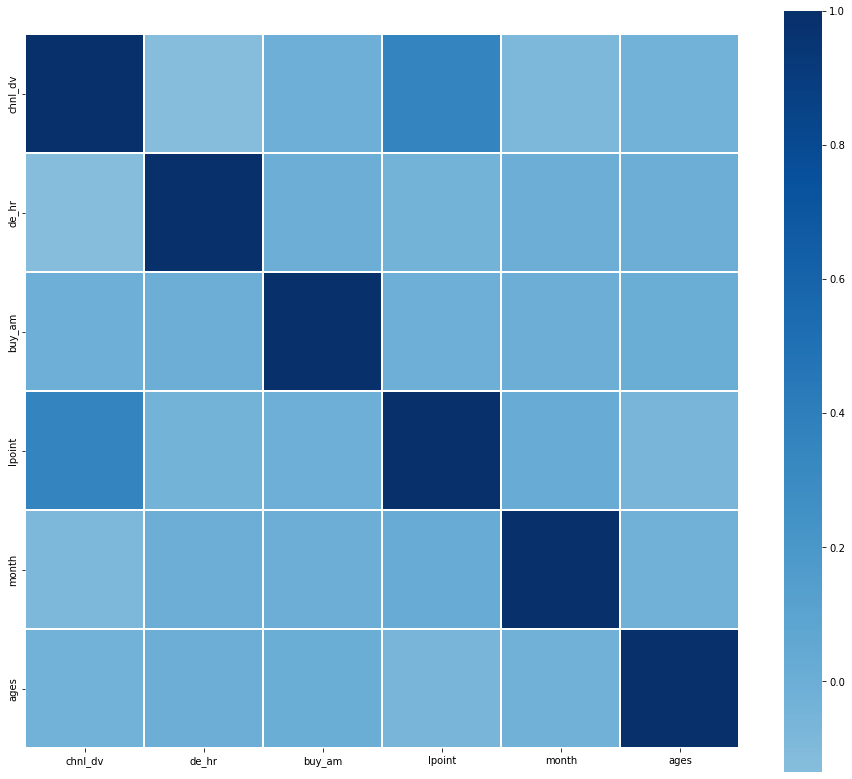

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
corr = lpay1.corr()
plt.figure(figsize=(16, 14))
sns.heatmap(corr, vmax=1, center=0,
            square=True, linewidths=2, cmap='Blues')
plt.show()

In [14]:
lpay1

,rct_no,cust,chnl_dv,de_hr,de_dt,cop_c,buy_am,lpoint,month,ma_fem_dv,ages,zon_hlv
0,20122713C012328716,M495972460,2,13,2020-12-27,C01,26000.0,0,12,남성,4,Z10
1,20122900C013317930,M192531170,2,0,2020-12-29,C01,10000.0,0,12,여성,4,Z10
2,20122911C011862577,M039320884,2,11,2020-12-29,C01,6500.0,0,12,여성,4,Z06
3,20123009C012921880,M201983289,2,9,2020-12-30,C01,24000.0,0,12,남성,4,Z10
4,20123012C011060420,M205977381,2,12,2020-12-30,C01,6500.0,0,12,남성,5,Z17
...,...,...,...,...,...,...,...,...,...,...,...,...
1774607,210125110644545,M470112503,2,11,2021-01-25,A06,51800.0,1,1,여성,5,Z16
1774608,210104210652271,M470112503,2,21,2021-01-04,A06,6440.0,1,1,여성,5,Z16
1774609,210119200278240,M748878049,1,20,2021-01-19,A02,17600.0,1,1,여성,3,Z10
1774610,210119180267206,M748878049,1,18,2021-01-19,A02,12400.0,1,1,여성,3,Z10


In [15]:
lpay1.describe().T
#Arrange columns by data type for easier manipulation
#음의상관간계 돞파악하기위해 원핫코딩에 0을 -1로 바꾼다

,count,mean,std,min,25%,50%,75%,max
chnl_dv,1774612.0,1.139149,0.346102,1.0,1.0,1.0,1.0,2.0
de_hr,1774612.0,15.246537,3.900055,0.0,13.0,15.0,18.0,23.0
buy_am,1774612.0,68827.988891,415615.047612,1.0,7200.0,17200.0,46430.0,70092000.0
lpoint,1774612.0,0.146353,0.353459,0.0,0.0,0.0,0.0,1.0
month,1774612.0,6.495960,3.384286,1.0,4.0,6.0,9.0,12.0
ages,1774612.0,3.919516,1.070224,2.0,3.0,4.0,5.0,7.0


In [16]:
#buy_am이 이싱값이 매우 크기때문에 75%까지 뽑았다.
final=lpay1
t=(final['buy_am']<46430) & (final['buy_am']>7200)
final=final[t]

In [17]:
#final=음의상관관계 파악하기 위해 0을 -1로 둔다.
final.loc[final.chnl_dv == 2, 'chnl_dv'] = -1
lst = ['cop_c', 'ma_fem_dv']
remove = list()
for i in lst:
    if (final[i].dtype == np.str or final[i].dtype == np.object):
        for j in final[i].unique():
            final[i+'_'+j] = np.where(final[i] == j,1,-1)
        remove.append(i)
final = final.drop(remove, axis=1)

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_23056\1409467500.py:6: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if (final[i].dtype == np.str or final[i].dtype == np.object):
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_23056\1409467500.py:6: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if (final[i].dtype == np.str or final[i].dtype == np.object):
C:\Users\Public\Documents\ESTsoft\CreatorTem

In [18]:
vars_=['buy_am','month','de_hr','ages']


In [20]:
#스케일링하기
minVec = final[vars_].min().copy()
maxVec = final[vars_].max().copy()
final[vars_] = (final[vars_]-minVec)/(maxVec-minVec)
final.describe().T

,count,mean,std,min,25%,50%,75%,max
chnl_dv,885825.0,0.722440,0.691434,-1.0,1.000000,1.000000,1.000000,1.0
de_hr,885825.0,0.668895,0.167340,0.0,0.565217,0.695652,0.782609,1.0
buy_am,885825.0,0.329820,0.270242,0.0,0.096856,0.255182,0.517630,1.0
lpoint,885825.0,0.142763,0.349831,0.0,0.000000,0.000000,0.000000,1.0
month,885825.0,0.497910,0.307410,0.0,0.272727,0.454545,0.727273,1.0
ages,885825.0,0.388551,0.213665,0.0,0.200000,0.400000,0.600000,1.0
cop_c_C01,885825.0,-0.925186,0.379514,-1.0,-1.000000,-1.000000,-1.000000,1.0
cop_c_E01,885825.0,-0.991748,0.128204,-1.0,-1.000000,-1.000000,-1.000000,1.0
cop_c_D01,885825.0,-0.843874,0.536541,-1.0,-1.000000,-1.000000,-1.000000,1.0
cop_c_D02,885825.0,-0.937805,0.347163,-1.0,-1.000000,-1.000000,-1.000000,1.0


In [22]:
from sklearn.linear_model import LogisticRegression
X=final[['chnl_dv','ma_fem_dv_남성','ma_fem_dv_여성','month','buy_am','cop_c_C01', 'cop_c_E01', 'cop_c_D01', 'cop_c_D02',          'cop_c_B01', 'cop_c_C02', 'cop_c_A01', 'cop_c_A02', 'cop_c_A03',       'cop_c_A04', 'cop_c_A05', 'cop_c_A06'
]]
y=final[['lpoint']]

In [36]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y)

In [38]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [39]:
y_pred = model.predict(x_test)

In [40]:
print(model.score(x_test, y_test))

0.8855037321014915


In [41]:
print(model.score(x_train, y_train))

0.8861203429424657


In [42]:
print(model.coef_)

[[-0.75751774  0.04503585 -0.04503585  0.62512975 -0.17224158 -0.02030773
  -1.00069165  0.20524783  0.14905365  0.2411207  -0.04094276  0.29070219
   0.06245482  0.05814807  0.39685503  0.65992019  1.02884052]]


In [43]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

0.11449626789850852

In [44]:
from sklearn.metrics import classification_report
print(classification_report(y_test,  y_pred))

              precision    recall  f1-score   support

           0       0.90      0.97      0.94    189548
           1       0.68      0.39      0.50     31909

    accuracy                           0.89    221457
   macro avg       0.79      0.68      0.72    221457
weighted avg       0.87      0.89      0.87    221457



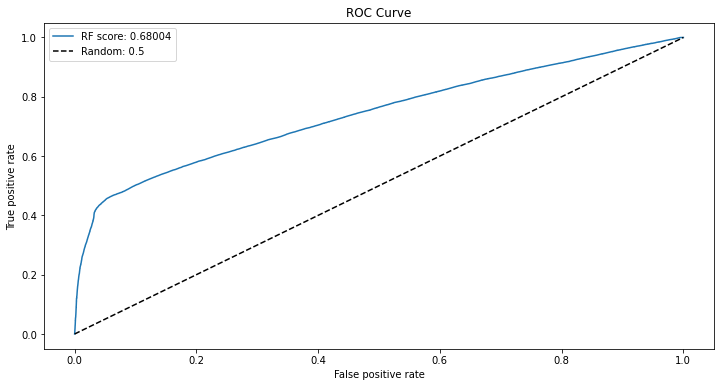

In [45]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

auc_RF_test, fpr_RF_test, tpr_RF_test = get_auc_scores(y_test,y_pred,model.predict_proba(x_test)[:,1])
                             
plt.figure(figsize = (12,6), linewidth= 1)
plt.plot(fpr_RF_test, tpr_RF_test, label = 'RF score: ' + str(round(auc_RF_test, 5)))
plt.plot([0,1], [0,1], 'k--', label = 'Random: 0.5')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.legend(loc='best')
#plt.savefig('roc_results_ratios.png')
plt.show()    
